In [1]:
#Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Modelling
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('toddler_autism_dataset_july_2018.csv')
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [3]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [4]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


Inference from the data description

* The maximum age in months is 27 months which implies that toddler dataset has no outliers in the age column
* Likewise the min value, the dataset does not have any lower outlier

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [6]:
df.shape

(1054, 19)

In [7]:
df.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

The dataset contains no missing values

In [8]:
df.duplicated().any()

np.False_

The dataset also does not contain any duplicated rows

---
> A new column (Age in years) is created from the age in months column for clearity

In [9]:
df['Age'] = df['Age_Mons'] // 12
df.drop('Age_Mons',axis=1,  inplace=True)

In [10]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,1,0,0,0,0,0,0,1,1,0,1,3,f,middle eastern,yes,no,family member,No,2
1,2,1,1,0,0,0,1,1,0,0,0,4,m,White European,yes,no,family member,Yes,3
2,3,1,0,0,0,0,0,1,1,0,1,4,m,middle eastern,yes,no,family member,Yes,3
3,4,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,no,no,family member,Yes,2
4,5,1,1,0,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,1,f,White European,no,yes,family member,No,2
1050,1051,0,0,1,1,1,0,1,0,1,0,5,m,black,yes,no,family member,Yes,1
1051,1052,1,0,1,1,1,1,1,1,1,1,9,m,middle eastern,yes,no,family member,Yes,1
1052,1053,1,0,0,0,0,0,0,1,0,1,3,m,White European,no,yes,family member,No,1


#### **DATA ANALYSIS**

In [11]:
df.Ethnicity.value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [12]:
df.Family_mem_with_ASD.value_counts()

Family_mem_with_ASD
no     884
yes    170
Name: count, dtype: int64

In [13]:
df['Who completed the test'].value_counts()

Who completed the test
family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: count, dtype: int64

From the above cell, we observe some discrepancies in the Who completed the test column
The issue is corrected thus

In [14]:
df['Who completed the test'] = df['Who completed the test'].replace('Health care professional', 'Health Care Professional')
df['Who completed the test'].value_counts()

Who completed the test
family member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: count, dtype: int64

In [15]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ', 'Age'],
      dtype='object')

Class/ASD Traits 
Yes    728
No     326
Name: count, dtype: int64


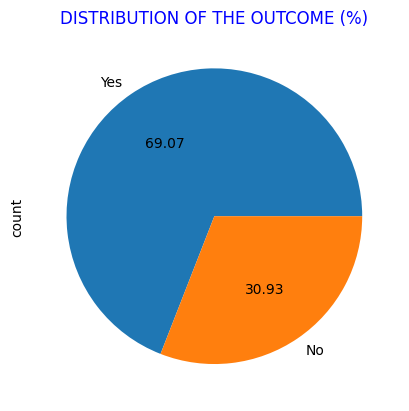

In [16]:
df['Class/ASD Traits '].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('DISTRIBUTION OF THE OUTCOME (%)', color='blue')

print(df['Class/ASD Traits '].value_counts())

We can observe that the dataset is skewed or imbalanced.
The dataset would be balanced later in the program

#### **FEATURE ENGINEERING**

In [17]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,1,0,0,0,0,0,0,1,1,0,1,3,f,middle eastern,yes,no,family member,No,2
1,2,1,1,0,0,0,1,1,0,0,0,4,m,White European,yes,no,family member,Yes,3
2,3,1,0,0,0,0,0,1,1,0,1,4,m,middle eastern,yes,no,family member,Yes,3
3,4,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,no,no,family member,Yes,2
4,5,1,1,0,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes,1


---
> The the categorical columns are encoded so the mdoel can the understand the data let’s convert ‘yes’ and ‘no’ to 0 and 1

In [18]:
df = df.replace({'Yes':1, 'No':0, 'yes':1, 'no':0})

Next, we categorize the column names into their various data types for easier computation

In [19]:
ints = []
objects = []
floats = []
 
for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

In [20]:
type = {}
for col in df.columns:
    type[col] = df[col].dtype
type

{'Case_No': dtype('int64'),
 'A1': dtype('int64'),
 'A2': dtype('int64'),
 'A3': dtype('int64'),
 'A4': dtype('int64'),
 'A5': dtype('int64'),
 'A6': dtype('int64'),
 'A7': dtype('int64'),
 'A8': dtype('int64'),
 'A9': dtype('int64'),
 'A10': dtype('int64'),
 'Qchat-10-Score': dtype('int64'),
 'Sex': dtype('O'),
 'Ethnicity': dtype('O'),
 'Jaundice': dtype('int64'),
 'Family_mem_with_ASD': dtype('int64'),
 'Who completed the test': dtype('O'),
 'Class/ASD Traits ': dtype('int64'),
 'Age': dtype('int64')}

In [21]:
ints.remove('Case_No')
ints.remove('Class/ASD Traits ')

The Case_No is a unique ID for each record. In this case, it doesnt affect the outcome hence they are both removed

In [22]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,1,0,0,0,0,0,0,1,1,0,1,3,f,middle eastern,1,0,family member,0,2
1,2,1,1,0,0,0,1,1,0,0,0,4,m,White European,1,0,family member,1,3
2,3,1,0,0,0,0,0,1,1,0,1,4,m,middle eastern,1,0,family member,1,3
3,4,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,0,0,family member,1,2
4,5,1,1,0,1,1,1,1,1,1,1,9,f,White European,0,1,family member,1,1


ENCODING CATEGORICAL COLUMNS

<Axes: xlabel='Class/ASD Traits ', ylabel='Qchat-10-Score'>

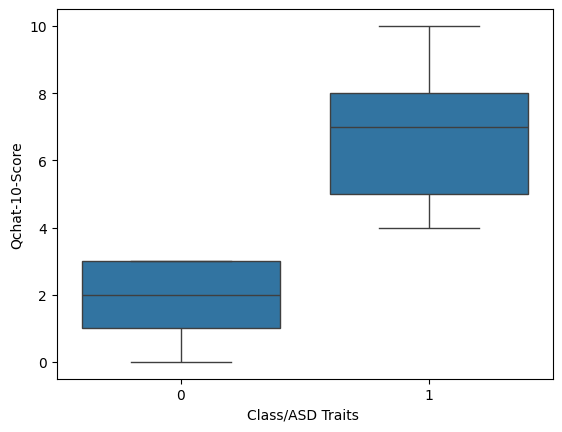

In [23]:
sns.boxplot(data=df, x='Class/ASD Traits ', y='Qchat-10-Score')

Here we observe that the A1-A10 columns are highly correlated to the target column. Also the Qchat-10-score is a sum of the A1-A10 values so these columns are droppped to avoid multicolinearity

In [24]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ', 'Age'],
      dtype='object')

In [25]:
df.drop(columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'Qchat-10-Score'], axis=1, inplace=True)

In [39]:
df['Ethnicity'].unique()

array(['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica'], dtype=object)

### **MODEL BUILDING**

In [27]:
x = df.drop(columns=['Case_No', 'Class/ASD Traits '], axis=1)
y = df['Class/ASD Traits ']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)


# Identify categorical and numeric columns
categorical_cols = x.select_dtypes(include=["object"]).columns
numeric_cols = x.select_dtypes(exclude=["object"]).columns

# Preprocessor: OHE for categorical, StandardScaler for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

In [28]:
print('x_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', X_test.shape)
print('y_test shape', y_test.shape)

x_train shape (895, 7)
y_train shape (895,)
x_test shape (159, 7)
y_test shape (159,)


### **Random Forest Pipeline and Classifier**

In [29]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)
predictions = rf_pipeline.predict(X_test)

print('Random Forest f1_score: ', round(metrics.f1_score(predictions, y_test)*100, 2))
print('Random Forest precision_score: ', round(metrics.precision_score(predictions, y_test)*100, 2))
print('Random Forest recall_score: ', round(metrics.recall_score(predictions, y_test)*100, 2))
print('AUC score', round(metrics.roc_auc_score(predictions, y_test)*100, 2))

Random Forest f1_score:  81.97
Random Forest precision_score:  90.91
Random Forest recall_score:  74.63
AUC score 67.31



# Observations

1. The AUC for the Random Forest Classifier is low, indicating that the dataset is imbalanced.
2. Imbalanced datasets are challenging to handle, as the model tends to overfit the majority class.
3. Handling imbalanced datasets is a common problem in machine learning, and there are several techniques to address this issue.
4. One popular technique is to use class weights or oversampling to balance the dataset.
5. Another technique is to use techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling to balance the dataset.
6. Another technique is to use techniques such as cost-sensitive learning or class-weighted loss functions to give more importance to the minority classes.
9. Another technique is to use techniques such as re-weighting the samples or changing the evaluation metric to handle imbalanced datasets.
10. It is important to evaluate the performance of the model on the unseen data to ensure that the model is not overfitting to the majority class.
11. It is also important to consider the ethical implications of using techniques to balance the dataset, as it may lead to biased results.
12. It is recommended to analyze the dataset and consider the domain knowledge to handle the imbalanced dataset appropriately.


### **Handling the Imbalanced Dataset**

In [30]:
y_train.value_counts()

Class/ASD Traits 
1    618
0    277
Name: count, dtype: int64

The train dataset is imbalanced with the 0 value being the minority class. The dataset will be balanced using the RandomOverSampler

#### Reason for using Random Over Sampling
Random Over Sampling is a technique used for balancing the dataset because it is a simple and effective way to ensure that both the minority and majority classes have an equal number of instances. This technique is particularly useful when dealing with imbalanced datasets where one class has a significantly larger number of instances compared to the other.

Random Over Sampling works by selecting a random sample from the minority class and duplicating it to match the size of the majority class. This helps to increase the representation of the minority class and reduces the bias towards the majority class.

By using Random Over Sampling, we can ensure that the model is trained on a balanced dataset, which can lead to better generalization and prevent overfitting to the minority class.


In [31]:
# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
sampled_x, sampled_y = ros.fit_resample(X_train,y_train)
sampled_y.value_counts()

Class/ASD Traits 
0    618
1    618
Name: count, dtype: int64

### **Random Forest**

In [32]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

rf_pipeline.fit(sampled_x, sampled_y)
predictions = rf_pipeline.predict(X_test)

print('Random Forest f1_score: ', round(metrics.f1_score(predictions, y_test)*100, 2))
print('Random Forest precision_score: ', round(metrics.precision_score(predictions, y_test)*100, 2))
print('Random Forest recall_score: ', round(metrics.recall_score(predictions, y_test)*100, 2))
print('AUC score', round(metrics.roc_auc_score(predictions, y_test)*100, 2))

Random Forest f1_score:  73.33
Random Forest precision_score:  70.0
Random Forest recall_score:  77.0
AUC score 60.53


### **Logistic Regression**

In [33]:
log_reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

log_reg_pipeline.fit(sampled_x, sampled_y)
predictions = log_reg_pipeline.predict(X_test)

print('Logistic Regression f1_score: ', round(metrics.f1_score(predictions, y_test)*100, 2))
print('Logistic Regression precision_score: ', round(metrics.precision_score(predictions, y_test)*100, 2))
print('Logistic Regression recall_score: ', round(metrics.recall_score(predictions, y_test)*100, 2))
print('AUC score', round(metrics.roc_auc_score(predictions, y_test)*100, 2))

Logistic Regression f1_score:  64.52
Logistic Regression precision_score:  54.55
Logistic Regression recall_score:  78.95
AUC score 59.35


### **XGBClassifier**

In [34]:
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier())
])

xgb_pipeline.fit(sampled_x, sampled_y)
predictions = xgb_pipeline.predict(X_test)

print('XGBoost f1_score: ', round(metrics.f1_score(predictions, y_test)*100, 2))
print('XGBoost precision_score: ', round(metrics.precision_score(predictions, y_test)*100, 2))
print('XGBoost recall_score: ', round(metrics.recall_score(predictions, y_test)*100, 2))
print('AUC score', round(metrics.roc_auc_score(predictions, y_test)*100, 2))

XGBoost f1_score:  76.5
XGBoost precision_score:  75.45
XGBoost recall_score:  77.57
AUC score 62.82


### **Naive Bayes**

In [35]:
nb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GaussianNB())
])

nb_pipeline.fit(sampled_x, sampled_y)
predictions = nb_pipeline.predict(X_test)

print('Naive Bayes f1_score: ', round(metrics.f1_score(predictions, y_test)*100, 2))
print('Naive Bayes precision_score: ', round(metrics.precision_score(predictions, y_test)*100, 2))
print('Naive Bayes recall_score: ', round(metrics.recall_score(predictions, y_test)*100, 2))
print('AUC score', round(metrics.roc_auc_score(predictions, y_test)*100, 2))

Naive Bayes f1_score:  6.96
Naive Bayes precision_score:  3.64
Naive Bayes recall_score:  80.0
AUC score 55.58


## **Save Models**

In [37]:
from save_models_script import save_your_models

# Save all your trained models
save_your_models(rf_pipeline, log_reg_pipeline, xgb_pipeline, nb_pipeline, sampled_x)

✅ All models saved successfully!
✅ Feature information saved!
✅ Model performance saved!

🚀 Ready to run Streamlit app!
Run: streamlit run streamlit_app.py


### **HYPERPARAMETER TUNING**

In [39]:
from sklearn.model_selection import GridSearchCV

### **Logistic Regression**

In [40]:
logeg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['liblinear', 'saga']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, sampled_y)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_logreg.predict(x_test_scaled)

print('Naive f1_score: ', metrics.f1_score(y_pred, y_test))
print('Naive precision_score: ', metrics.precision_score(y_pred, y_test))
print('Naive recall_score: ', metrics.recall_score(y_pred, y_test))
print('AUC score', metrics.roc_auc_score(y_pred, y_test))

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Naive f1_score:  0.8514851485148516
Naive precision_score:  0.7818181818181819
Naive recall_score:  0.9347826086956522
AUC score 0.7882868267358859


> **Tuning the Logistic Regression Model did not have much effect on the model accuracy**

### **XGBClassifier**

In [41]:
xgb_model = XGBClassifier()

# Define the hyperparameters to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train_scaled, sampled_y)
best_xgb = grid_search.best_estimator_
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


# Predict on the test set using the best model
y_pred = grid_search.predict(x_test_scaled)

# Evaluate the model
print('XGB f1_score: ', metrics.f1_score(y_pred, y_test))
print('XGB precision_score: ', metrics.precision_score(y_pred, y_test))
print('XGB recall_score: ', metrics.recall_score(y_pred, y_test))
print('AUC score', metrics.roc_auc_score(y_pred, y_test))

Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
XGB f1_score:  0.8640776699029126
XGB precision_score:  0.8090909090909091
XGB recall_score:  0.9270833333333334
AUC score 0.7968750000000002


> **Tuning the XGBClassifier Model increased the AUC_score from 82% to 87%**

### **Random Forest**

In [45]:
rf_model = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
grid_search = GridSearchCV(
    rf_model,
    param_grid=param_grid,  
    scoring='accuracy',  
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train_scaled, sampled_y)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
y_pred = grid_search.predict(x_test_scaled)

# Evaluate the performance of the model
print('RFC f1_score: ', metrics.f1_score(y_pred, y_test))
print('RFC precision_score: ', metrics.precision_score(y_pred, y_test))
print('RFC recall_score: ', metrics.recall_score(y_pred, y_test))
print('AUC score', metrics.roc_auc_score(y_pred, y_test))

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RFC f1_score:  0.8625592417061612
RFC precision_score:  0.8272727272727273
RFC recall_score:  0.900990099009901
AUC score 0.7867019460566747


## **PLOTTING THE ROC CURVE**

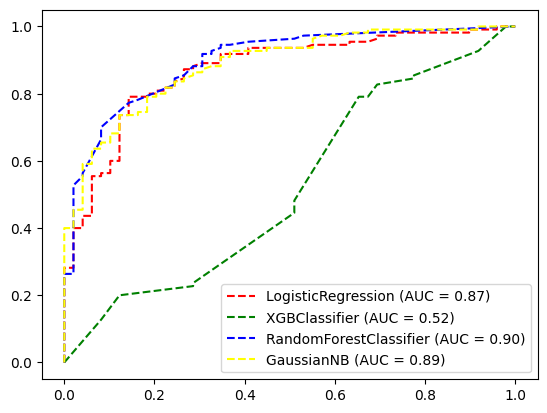

In [50]:
pred_models = [logreg, xgb, rfc, nb_classifier]
colors = ['red', 'green', 'blue', 'yellow']

for model, color in zip(pred_models, colors):
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})', linestyle='--', color=color)
    
plt.legend()

Here, we observe that the XGBoost Classifier algorithm performs better on the dataset

#### **CONFUSION MATRIX**

Text(0.5, 1.0, 'Confusion Matrix of the Random forest Predictions')

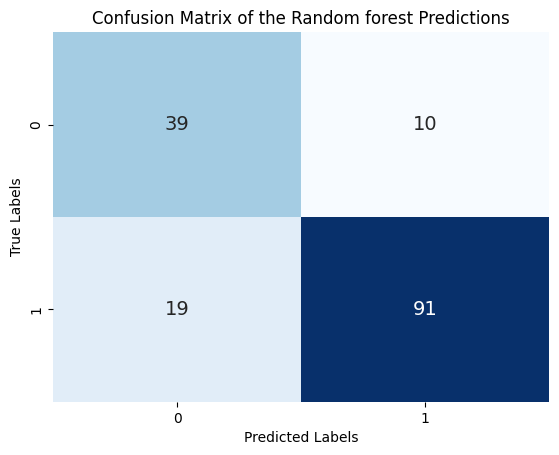

In [60]:
#Get the confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of the Random forest Predictions')

The model would be saved in an pkl file upon further updates